In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys
#apply function of all xs

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

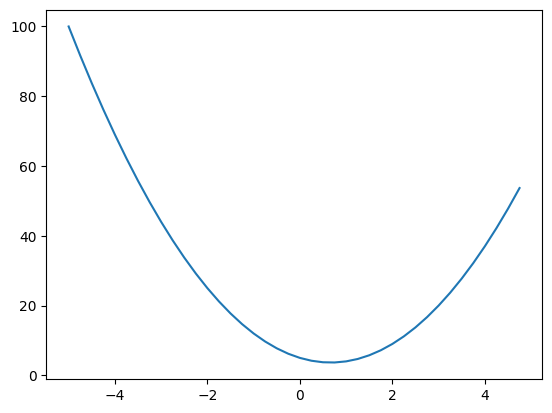

In [6]:
#plot ys
plt.plot(xs, ys)

In [7]:
#what is the derivative of this function at any single input point x?
#in math you find expression for derivative of the original function and then plug values
h = 0.0001
x = 3.0
f(x)

20.0

In [8]:
f(x+h)

20.001400030000006

In [9]:
f(x+h) - f(x)
#how much the function responded in positive direction

0.0014000300000063248

In [10]:
#normalize by run to get slope
(f(x+h) - f(x))/h
#at 3 slope is 14

14.000300000063248

In [11]:
#more complex case
a=2.0
b=-3.0
c=10.0
d=a*b + c
print(d)

4.0


In [12]:
#we want to look at derivative with respect to a b and c
h = 0.0001

#inputs
a=2.0
b=-3.0
c=10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h) #value of b since derivative expression of d respect to a would be b

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [13]:

#inputs
a=2.0
b=-3.0
c=10.0

d1 = a * b + c
b += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h) #val of a since derivative expression of d respect to b would be a

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [14]:

#inputs
a=2.0
b=-3.0
c=10.0

d1 = a * b + c
c += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h) #1 since derivative expression of d respect to c would be 1

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [15]:
#neural networks
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self): #representing output format
    return f"Value(data={self.data})"

  def __add__(self, other): #define methods in python
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other): #define methods in python
      out = Value(self.data * other.data)
      return out



a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a+b #python doesnt know how to add two value objects
#python internally calling a.__add__(b)
a*b #a.__mul__(b)
d = a*b + c #(a.__mul__(b)).__add__(c)
d

Value(data=4.0)

In [16]:
#we need to make pointers to keep info about what values produce what other values

class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')#self and other are children of the output value and they created it
    return out

  def __mul__(self, other):
      out = Value(self.data * other.data, (self, other), 'x')
      return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
d

Value(data=4.0)

In [17]:
d._prev #shows children but not operation that created them

{Value(data=-6.0), Value(data=10.0)}

In [18]:
d._op #show operation

'+'

In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [20]:
#we need to make pointers to keep info about what values produce what other values

class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None #default empty function
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')#self and other are children of the output value and they created it

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad

    out._backward = _backward
    return out

  def __mul__(self, other):
      out = Value(self.data * other.data, (self, other), 'x')
      def _backward():
        self.grad = other.data * out.grad
        other.grad = self.data * out.grad

      out._backward = _backward

      return out

  def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self, ), 'tanh')

      def _backward():
        self.grad = (1 - t**2) * out.grad

      out._backward = _backward

      return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(o)
    topo

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
f=Value(-2.0, label='f')
L = d*f
L.label = 'L'
L

Value(data=-8.0)

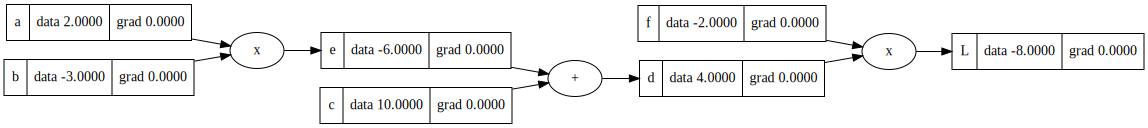

In [21]:
draw_dot(L)
#we are able to build mathematical expressions using + and x so far

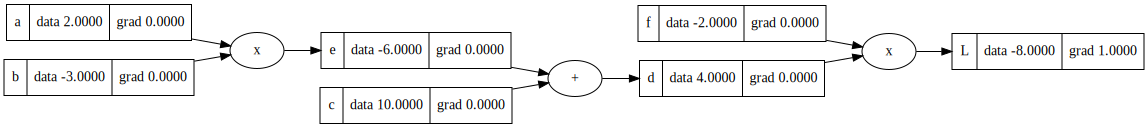

In [22]:
L.grad = 1.0
draw_dot(L)

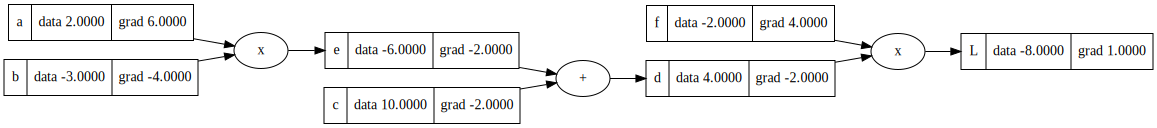

In [23]:
# L = d*f
# dL/dd = d(d*f)/dd = f
# so d.grad = f.data = -2
#dL / dc = dL/dd * dd/dc = f * d(c + e)/dc = f * 1 = f
d.grad = f.data
f.grad = d.data
c.grad = f.data
e.grad = f.data
a.grad = b.data * e.grad
b.grad = a.data * e.grad
draw_dot(L)

In [24]:
#nudging leaf nodes
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
#d.data += 0.01 * d.grad
#e.data += 0.01 * e.grad
f.data += 0.01 * f.grad

#forward pass
e = a * b
d = c + e
L = f * d

print(L.data) #nudge data in positive direction

-7.286496


In [25]:
def lol():

  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f=Value(-2.0, label='f')
  L = d*f
  L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f=Value(-2.0, label='f')
  L = d*f
  L.label = 'L'
  L2 = L.data + h

  print((L2 - L1)/h) #rise over run

lol()

0.9999999999976694


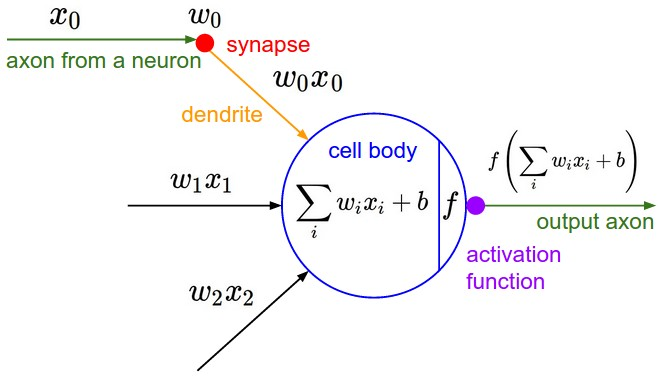

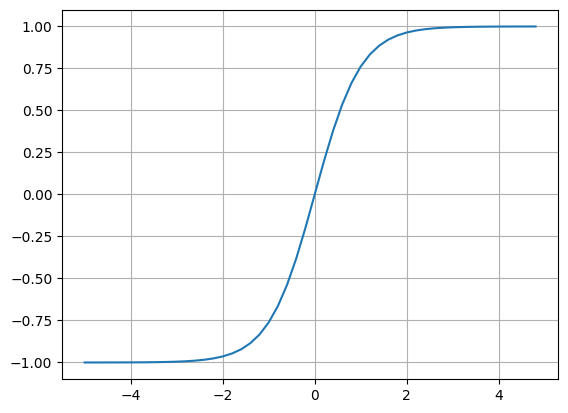

In [26]:
'''
some inputs axon x0 go to synapse w are weigts
synapse interacts with input to this neuron
data that flow into neuron is w0x0 and ...
- cell body has sum of all wnxn and bias
- bias = trigger happyness of neuron
take all inputs and bias into activation function
- squash the inputs(sigmoid, tanh)
'''

plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); #tanh function
plt.grid();
#inputs get squashed on y coordinate

In [27]:
#squashing function = activation function
#output = activation function applied to dot product of the weights and inputs

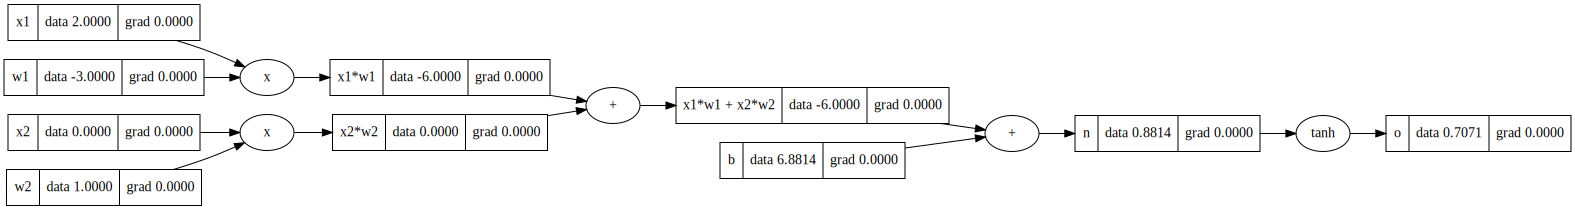

In [28]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2 = synaptic strengths per input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#add activation function
o = n.tanh() # have not yet implemented tanh (need exponentiation)
o.label ='o'
draw_dot(o)

In [29]:
'''
o.grad = 1.0
# o = tanh(n)
#what is do/dn
# - =1 - tanh(n)**2
n.grad = 1 - o.data**2
x1w1x2w2.grad = 1 * n.grad
b.grad = 1 * n.grad
x1w1.grad = 1 * x1w1x2w2.grad
x2w2.grad = 1 * x1w1x2w2.grad
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
w2.grad = x2w2.grad * x2.data
x2.grad = x2w2.grad * w2.data
#difficult, want to do it automatically

draw_dot(o)'''

'\no.grad = 1.0\n# o = tanh(n)\n#what is do/dn\n# - =1 - tanh(n)**2\nn.grad = 1 - o.data**2\nx1w1x2w2.grad = 1 * n.grad\nb.grad = 1 * n.grad\nx1w1.grad = 1 * x1w1x2w2.grad\nx2w2.grad = 1 * x1w1x2w2.grad\nx1.grad = x1w1.grad * w1.data\nw1.grad = x1w1.grad * x1.data\nw2.grad = x2w2.grad * x2.data\nx2.grad = x2w2.grad * w2.data\n#difficult, want to do it automatically\n\ndraw_dot(o)'

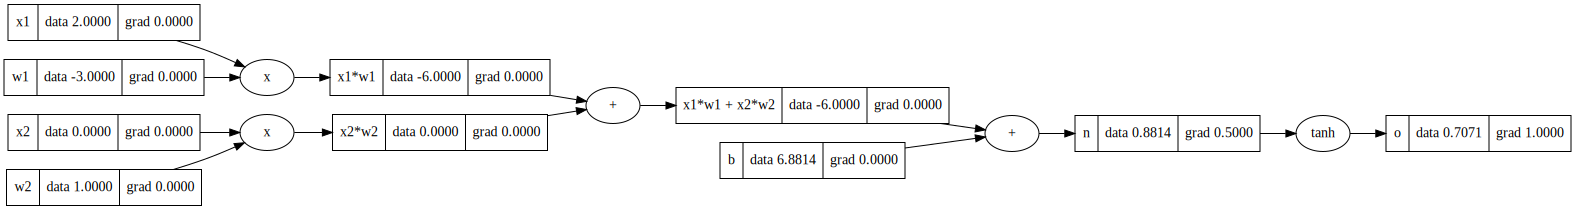

In [30]:
o.grad = 1.0
o._backward()
draw_dot(o)

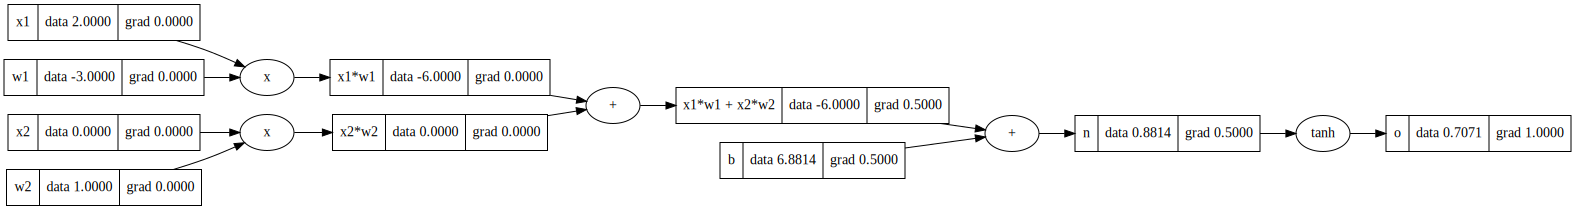

In [31]:
n._backward()
draw_dot(o)

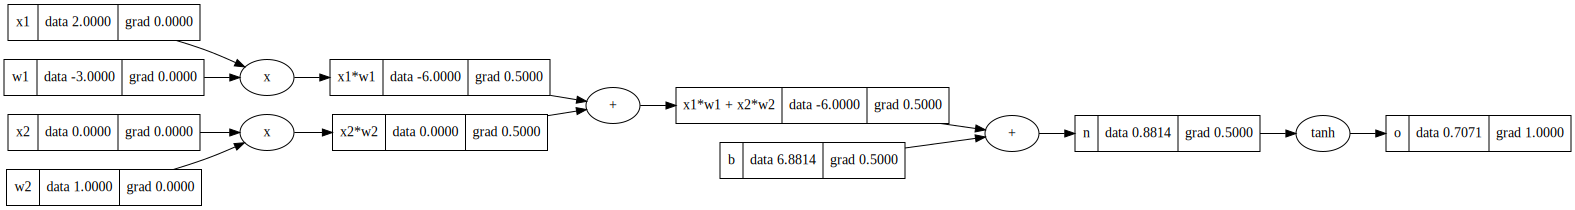

In [32]:
x1w1x2w2._backward()
draw_dot(o)

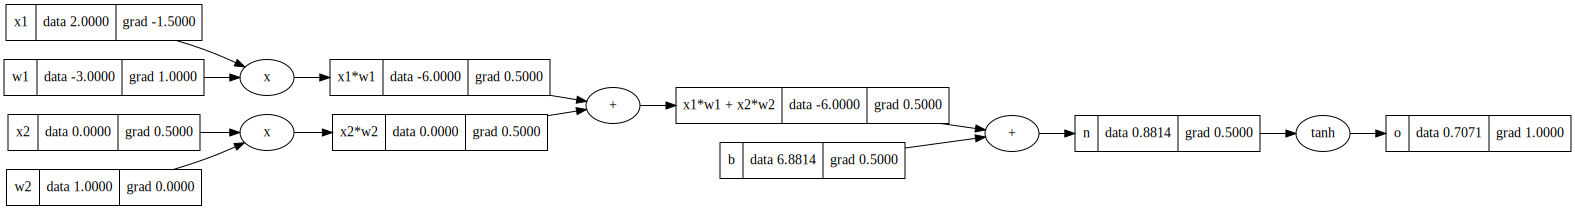

In [33]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [34]:
#implement topological sort to implement backward to all non leaf nodes
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child) #only add node to topo list after all its children have been processed
    topo.append(v)
build_topo(o)
topo


[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

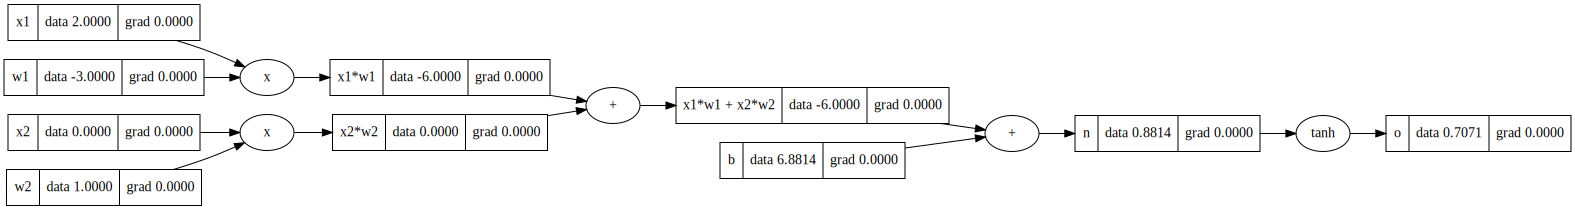

In [35]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
o.label ='o'
draw_dot(o)

In [36]:
'''topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

o.grad = 1.0
for node in reversed(topo):
  node._backward()

draw_dot(o)
#hide code in Value '''

'topo = []\nvisited = set()\ndef build_topo(v):\n  if v not in visited:\n    visited.add(v)\n    for child in v._prev:\n      build_topo(child)\n    topo.append(v)\nbuild_topo(o)\ntopo\n\no.grad = 1.0\nfor node in reversed(topo):\n  node._backward()\n\ndraw_dot(o)\n#hide code in Value '

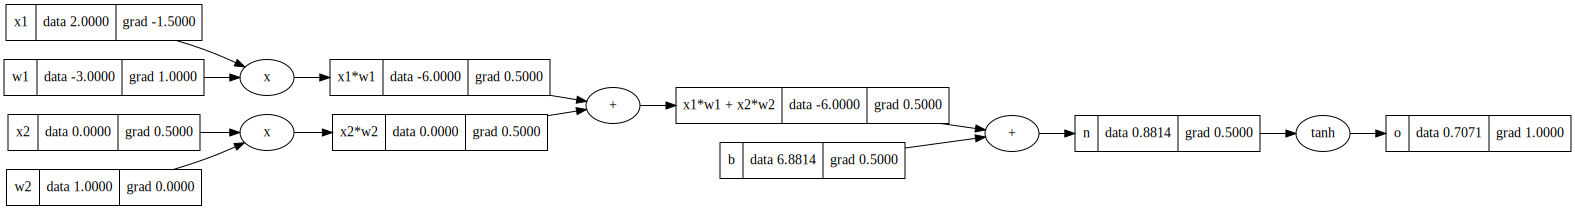

In [37]:
o.backward()
draw_dot(o)